In [48]:
import pandas as pd
# pd.set_option('max_colwidth', 50)
# set this if you need to
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
killings = pd.read_csv('./data/police-killings.csv')
killings.head()

,Unnamed: 0,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,lawenforcementagency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


In [90]:
killings.describe()

,Unnamed: 0,age,day,year,county_income
count,467.000000,467.000000,467.000000,467,467.000000
mean,233.000000,37.351178,15.830835,2015,52527.331906
std,134.955548,12.944617,8.658970,0,12948.263811
min,0.000000,16.000000,1.000000,2015,22545.000000
25%,116.500000,28.000000,8.000000,2015,43804.000000
50%,233.000000,35.000000,16.000000,2015,50856.000000
75%,349.500000,45.000000,23.000000,2015,56832.000000
max,466.000000,87.000000,31.000000,2015,110292.000000


In [91]:
# 1. Make the following changed to column names:
# lawenforcementagency -> agency
# raceethnicity        -> race
killings.rename(columns={'lawenforcementagency': 'agency', 'raceethnicity':'race'}, inplace=True)
killings.head(1)

,Unnamed: 0,name,age,gender,race,month,day,year,streetaddress,city,state,agency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766


In [92]:
# 2. Show the count of missing values in each column
killings.isnull().sum()

Unnamed: 0       0
name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    4
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

In [93]:
# 3. replace each null value in the dataframe with the string "Unknown"
#Why isn't this working? 
killings.fillna(value='unknown')

,Unnamed: 0,name,age,gender,race,month,day,year,streetaddress,city,state,agency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669
5,5,Adam Reinhart,29,Male,White,March,7,2015,18th St and Palm Ln,Phoenix,AZ,Phoenix Police Department,Gunshot,No,53596
6,6,Adrian Hernandez,22,Male,Hispanic/Latino,March,27,2015,4000 Union Ave,Bakersfield,CA,Bakersfield Police Department,Gunshot,Firearm,48552
7,7,Adrian Solis,35,Male,Hispanic/Latino,March,26,2015,1500 Bayview Ave,Wilmington,CA,Los Angeles Police Department,Gunshot,Non-lethal firearm,55909
8,8,Alan Alverson,44,Male,White,January,28,2015,Pickett Runn Rd,Sunset,TX,Wise County Sheriff's Department and Texas DPS,Gunshot,Firearm,38310
9,9,Alan James,31,Male,White,February,7,2015,200 Abbie St SE,Wyoming,MI,Kentwood Police Department and Wyoming DPS,Gunshot,Other,51667


In [78]:
# 4. How many killings were there so far in 2015?
killings[killings.year == 2015].year.count()

467

In [79]:
# 5. Of all killings, how many were male and how many female?
killings[killings.gender == 'Male'].gender.count()

445

In [80]:
killings[killings.gender == 'Female'].gender.count()

22

In [81]:
# 6. How many killings were of unarmed people?
killings[killings.armed == 'No'].armed.count()

102

In [124]:
killings[killings.armed == 'No'].count()/killings.armed.count()

Unnamed: 0       0.218415
name             0.218415
age              0.218415
gender           0.218415
race             0.218415
month            0.218415
day              0.218415
year             0.218415
streetaddress    0.218415
city             0.218415
state            0.218415
agency           0.218415
cause            0.218415
armed            0.218415
county_income    0.218415
dtype: float64

In [87]:
# 8. What are the 5 states with the most killings?
killings.state.value_counts().head(5)

CA    74
TX    46
FL    29
AZ    25
OK    22
Name: state, dtype: int64

In [88]:
# 9. Show a value counts of deaths for each race
killings.race.value_counts()

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: race, dtype: int64

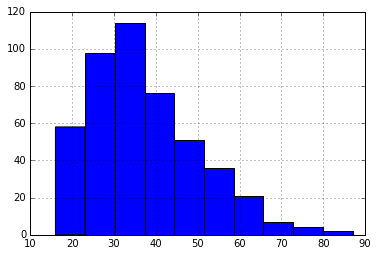

In [114]:
# 10. Display a histogram of ages of all killings
killings.age.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e536990>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x120e76490>]], dtype=object)

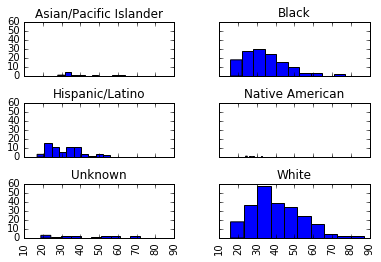

In [116]:
# 11. Show 6 histograms of ages by race
killings.age.hist(by=killings.race, sharex=True, sharey=True )

In [117]:
# 12. What is the average age of death by race?
killings.groupby('race').age.mean()

race
Asian/Pacific Islander    40.800000
Black                     34.044444
Hispanic/Latino           31.716418
Native American           27.750000
Unknown                   43.533333
White                     40.466102
Name: age, dtype: float64

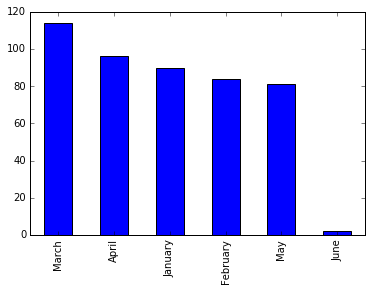

In [126]:
# 13. Show a bar chart with counts of deaths every month
killings.month.value_counts().plot(kind='bar')

In [ ]:
###################
### Less Morbid ###
###################

In [139]:
majors = pd.read_csv('./data/college-majors.csv')
majors.head()

,Unnamed: 0,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000
1,1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000
2,2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000
3,3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000
4,4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000


In [140]:
# 1. Delete the columns (employed_full_time_year_round, major_code)
del majors['Employed_full_time_year_round']

In [141]:
del majors['Major_code']

In [142]:
majors.head(3)

,Unnamed: 0,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000
1,1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000
2,2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000


In [144]:
# 2. Show the cout of missing values in each column
majors.isnull().sum()

Unnamed: 0           0
Major                0
Major_category       0
Total                0
Employed             0
Unemployed           0
Unemployment_rate    0
Median               0
P25th                0
P75th                0
dtype: int64

In [152]:
# 3. What are the top 10 highest paying majors?
majors.groupby('Major_category').P75th.mean().head(10)

Major_category
Agriculture & Natural Resources     81300.000000
Arts                                64500.000000
Biology & Life Science              78771.428571
Business                            91461.538462
Communications & Journalism         76250.000000
Computers & Mathematics             95818.181818
Education                           58456.250000
Engineering                        108534.482759
Health                              77500.000000
Humanities & Liberal Arts           70933.333333
Name: P75th, dtype: float64

In [170]:
# 3. What are the top 10 highest paying majors?
majors.groupby('Major').P75th.mean().head(10)

Major
ACCOUNTING                               100000
ACTUARIAL SCIENCE                        115000
ADVERTISING AND PUBLIC RELATIONS          75000
AEROSPACE ENGINEERING                    110000
AGRICULTURAL ECONOMICS                    98000
AGRICULTURE PRODUCTION AND MANAGEMENT     80000
ANIMAL SCIENCES                           72000
ANTHROPOLOGY AND ARCHEOLOGY               68000
APPLIED MATHEMATICS                      106000
ARCHITECTURAL ENGINEERING                102000
Name: P75th, dtype: float64

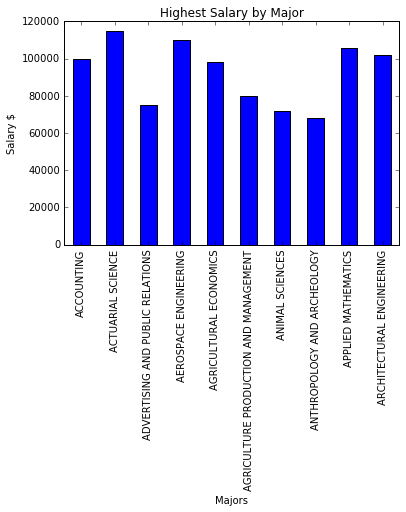

In [171]:
# 4. Plot the data from the last question in a bar chart, include proper title, and labels!
majors.groupby('Major').P75th.mean().head(10).plot(kind='bar', title='Highest Salary by Major')
plt.xlabel('Majors')
plt.ylabel('Salary $')

In [172]:
# 5. What is the average median salary for each major category?
majors.groupby('Major_category').Median.mean()

Major_category
Agriculture & Natural Resources        55000.000000
Arts                                   43525.000000
Biology & Life Science                 50821.428571
Business                               60615.384615
Communications & Journalism            49500.000000
Computers & Mathematics                66272.727273
Education                              43831.250000
Engineering                            77758.620690
Health                                 56458.333333
Humanities & Liberal Arts              46080.000000
Industrial Arts & Consumer Services    52642.857143
Interdisciplinary                      43000.000000
Law & Public Policy                    52800.000000
Physical Sciences                      62400.000000
Psychology & Social Work               44555.555556
Social Science                         53222.222222
Name: Median, dtype: float64

In [173]:
# 6. Show only the top 5 paying major categories
majors.groupby('Major_category').Median.mean().head(5)

Major_category
Agriculture & Natural Resources    55000.000000
Arts                               43525.000000
Biology & Life Science             50821.428571
Business                           60615.384615
Communications & Journalism        49500.000000
Name: Median, dtype: float64

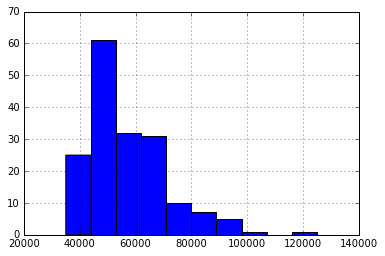

In [178]:
# 7. Plot a histogram of the distribution of median salaries
majors.Median.hist()

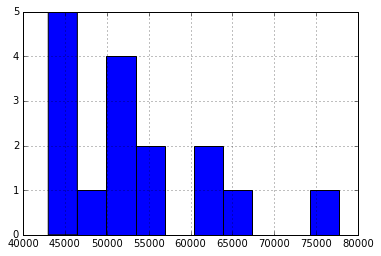

In [159]:
# 8. Plot a histogram of the distribution of median salaries by major category
majors.groupby('Major_category').Median.mean().hist()

In [182]:
# 9. What are the top 10 most UNemployed majors?
majors.sort_index(by='Unemployed').tail(10)

/Users/anastasia.petrie/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


,Unnamed: 0,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th
78,78,BIOLOGY,Biology & Life Science,839454,583079,36757,0.059301,51000,35000,80000
25,25,GENERAL EDUCATION,Education,1438867,843693,38742,0.043904,43000,32000,59000
132,132,POLITICAL SCIENCE AND GOVERNMENT,Social Science,748956,541630,40376,0.069374,58000,38000,90000
164,164,MARKETING AND MARKETING RESEARCH,Business,1114624,890125,51839,0.055033,56000,38500,90000
73,73,ENGLISH LANGUAGE AND LITERATURE,Humanities & Liberal Arts,1098647,708882,52248,0.068645,50000,32900,75000
13,13,COMMUNICATIONS,Communications & Journalism,987676,790696,54390,0.064360,50000,35000,80000
159,159,ACCOUNTING,Business,1779219,1335825,75379,0.053415,65000,42500,100000
114,114,PSYCHOLOGY,Psychology & Social Work,1484075,1055854,79066,0.069667,45000,31000,68000
158,158,GENERAL BUSINESS,Business,2148712,1580978,85626,0.051378,60000,40000,95000
161,161,BUSINESS MANAGEMENT AND ADMINISTRATION,Business,3123510,2354398,147261,0.058865,58000,39500,86000


In [ ]:
# What are the unemployment rates?


In [ ]:
# 10. What are the top 10 most UNemployed majors CATEGORIES? Use the mean for each category
# What are the unemployment rates?

In [ ]:
# 11. the total and employed column refer to the people that were surveyed.
# Create a new column showing the emlpoyment rate of the people surveyed for each major
# call it "sample_employment_rate"
# Example the first row has total: 128148 and employed: 90245. it's 
# sample_employment_rate should be 90245.0 / 128148.0 = .7042

In [ ]:
# 12. Create a "sample_unemployment_rate" colun
# this column should be 1 - "sample_employment_rate"

In [ ]:
###################
### More Tasty ###
###################

The Health Department has developed an inspection report and scoring system. 
After conducting an inspection of the facility, the Health Inspector calculates a score based on the violations observed. 
Violations can fall into:
- **high risk category**: records specific violations that directly relate to the transmission of food borne illnesses,the adulteration of food products and the contamination of food-contact surfaces.
- **moderate risk category**: records specific violations that are of a moderate risk to the public health and safety.
- **low risk category**: records violations that are low risk or have no immediate risk to the public health and safety.

In [ ]:
businesses = pd.read_csv('./data/businesses_plus.csv', parse_dates=True, dtype={'phone_number': str})
businesses.head()

In [ ]:
inspections = pd.read_csv('./data/inspections_plus.csv', parse_dates=True)
inspections.head()

In [ ]:
violations = pd.read_csv('./data/violations_plus.csv', parse_dates=True)
violations.head()

In [ ]:
# 1 Combine the three dataframes into one data frame called restaurant_scores
# Hint: http://pandas.pydata.org/pandas-docs/stable/merging.html

In [ ]:
# 2 Which ten business have had the most inspections?

In [ ]:
# 3 Group and count the inspections by type

In [ ]:
# 4 Create a plot that shows number of inspections per month
# Bonus for creating a heatmap
# http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html?highlight=heatmap

In [ ]:
# 5 Which zip code contains the most high risk violations?

In [ ]:
# 6 If inspection is prompted by a change in restaurant ownership, 
# is the inspection more likely to be categorized as higher or lower risk?

In [ ]:
# 7 Examining the descriptions, what is the most common violation?

In [ ]:
# 8 What street has the best (safest) restaurants to dine out at?

In [ ]:
# 9 Create a hist of the scores with 10 bins

In [ ]:
# 8 Extra Credit:
# Use Instagram location API to find pictures taken at the lat, long of the most High Risk restaurant
# https://www.instagram.com/developer/endpoints/locations/